### General Pipeline Classification Analysis

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as n

import sys
sys.path.insert(0, 'python')
from tuning_results import TuningResults

In [2]:
csv_file=None
#csv_file='tune_dtc.csv'
#csv_file='tune_lrc_desc.csv'
#csv_file='tune_lrc_descs.csv'
#csv_file='tune_lrc_fp.csv'
#csv_file='tune_lrc_fps.csv'
#csv_file='tune_lsvc_desc.csv'
#csv_file='tune_lsvc_descs.csv'
#csv_file='tune_lsvc_fp.csv'
#csv_file='tune_lsvc_fps.csv'
#csv_file='tune_nb_bn.csv'
#csv_file='tune_nb_mn.csv'
#csv_file='tune_rfc.csv'
#csv_file='tune_weka_rfc.csv'
#csv_file='tune_smile_svc_tanimoto_fp.csv'
#csv_file='tune_smile_svc_poly.csv'
#csv_file='tune_smile_svc_rbf.csv'
#csv_file='tune_weka_fold_rfc.csv'
#csv_file='tune_weka_nb_bn.csv'
csv_file='tune_smile_nb.csv'

In [3]:
tuning_results = TuningResults(csv_file, classification=True, all_systems=False)

Found parameters ['alpha', 'featuresColumn', 'submethod']


In [4]:
tuning_results.global_summary()

,name,method,alpha,featuresColumn,submethod,auc,f1,f2,f3
19,data_chagas,SMILE_NB,2.0,rdkit_fp,Bernoulli,0.800018,0.797973,0.808007,0.794074
59,data_herg,SMILE_NB,2.0,rdkit_fp,Multinomial,0.848035,0.793741,0.890933,0.859431
9,data_lipinski,SMILE_NB,0.5,rdkit_fp,Multinomial,0.753411,0.799107,0.734219,0.726908
89,data_malaria,SMILE_NB,0.5,rdkit_fp,Multinomial,0.969771,0.978506,0.974635,0.956172
38,data_solubility,SMILE_NB,1.0,cdk_fp,Bernoulli,0.881943,0.909321,0.935202,0.801307
77,data_tuberculosis,SMILE_NB,0.5,cdk_fp,Multinomial,0.713875,0.710385,0.717312,0.713927


In [5]:
tuning_results.best_summary()

Iterating over:
Features (cdk_fcfp, rdkit_fcfp)
Bayes Laplacian smoothing (0.0, 0.5, 1.0, 2.0)
Method (Bernoulli, Multinomial)
Best common settings:
Features: rdkit_fcfp
Bayes Laplacian smoothing: 0.5
Method: Bernoulli
RMSE: 0.01758050155641837


,name,auc
17,data_chagas,0.798934
49,data_herg,0.838628
1,data_lipinski,0.728678
81,data_malaria,0.954432
33,data_solubility,0.852463
65,data_tuberculosis,0.706900


In [6]:
tuning_results.summary()

summary file is /home/gareth/src/os-models/jupyter-notebooks/summaries/classification/tune_smile_nb_summary.csv
Mean common metric 0.813 global metric 0.828
global to common RMSE is 0.018


,name,auc_global,auc_common,delta
0,data_chagas,0.800018,0.798934,0.001084
1,data_herg,0.848035,0.838628,0.009407
2,data_lipinski,0.753411,0.728678,0.024734
3,data_malaria,0.969771,0.954432,0.015339
4,data_solubility,0.881943,0.852463,0.029480
5,data_tuberculosis,0.713875,0.706900,0.006975


In [7]:
tuning_results.best_summary_by_feature()

Features: ['rdkit_fp', 'cdk_fp']
Iterating over:
alpha: [2.0, 1.0, 0.5, 0.0]
submethod: ['Multinomial', 'Bernoulli']


,alpha,submethod,test_rmse,rmse,feature
0,0.5,Bernoulli,0.813339,0.017581,rdkit_fp
1,0.5,Bernoulli,0.812740,0.020420,cdk_fp


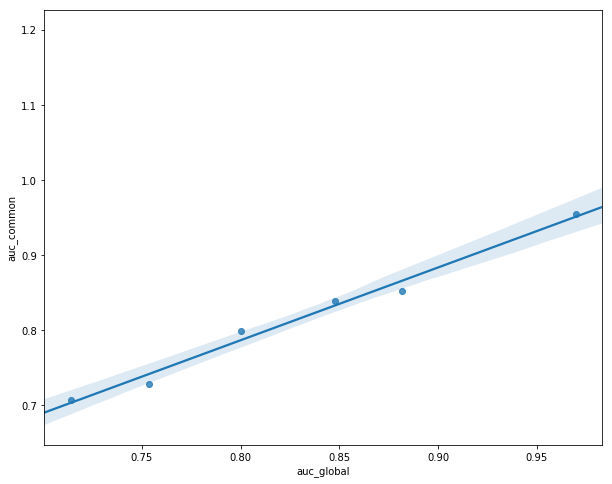

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
metric = tuning_results.metric_name()
sns.regplot(x='{}_global'.format(metric), y='{}_common'.format(metric), data=tuning_results.summary_df, ax=axes)
axes.plot([0.2, 0.2], [1.2, 1.2], linewidth=2)

/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


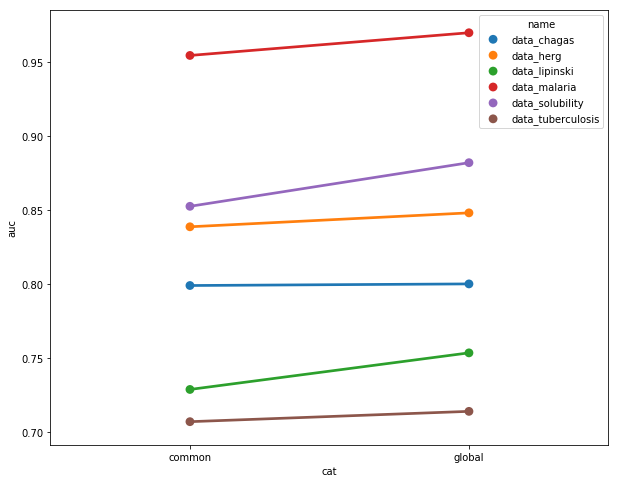

In [9]:
category_df = tuning_results.category()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.pointplot(x='cat', y=metric, hue='name', data=category_df, ax=axes)